In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns


In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.groupby('sex',observed=False)[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [5]:
df.groupby(['sex','smoker'],observed=False)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [6]:
# using pivot_table
df.pivot_table(index='sex',columns='smoker',values='total_bill',observed=False)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [7]:
df.pivot_table(index='sex', columns='smoker', aggfunc='count',observed=False)


day     size     time     tip     total_bill    
smoker Yes  No  Yes  No  Yes  No Yes  No        Yes  No
sex                                                    
Male    60  97   60  97   60  97  60  97         60  97
Female  33  54   33  54   33  54  33  54         33  54

In [8]:
#  Multidimensional pivot table
df.pivot_table(index=['sex','smoker'], columns=['day','time'],observed=False)

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [9]:
df.pivot_table(index=['sex','smoker'], columns=['day','time'],values=['total_bill'],observed=False)


total_bill                                                
day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [10]:
df.pivot_table(index=['sex','smoker'], columns=['day','time'],observed=False,aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [11]:
# margins
df.pivot_table(index='sex', columns='smoker',values='total_bill', margins=True,observed=False)

smoker,Yes,No,All
sex,,,
Male,22.284500,19.791237,20.744076
Female,17.977879,18.105185,18.056897
All,20.756344,19.188278,19.785943


In [12]:
# plotting
df = pd.read_csv('../datasets/expense_data.csv')

In [13]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [15]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [16]:
df['Month']=df['Date'].dt.month_name()

<Axes: xlabel='Month'>

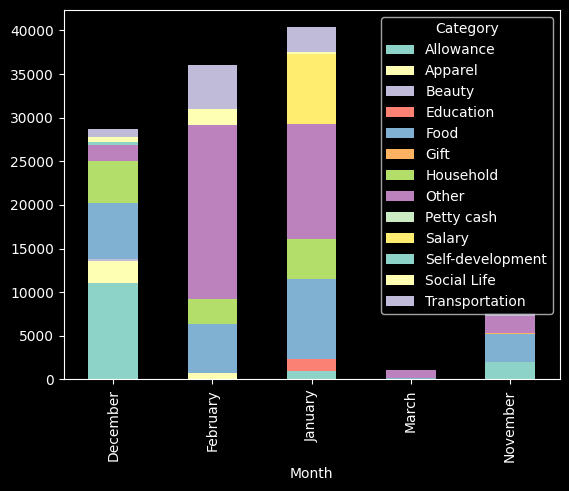

In [17]:
df.pivot_table(index = 'Month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot(kind='bar',stacked=True)

<Axes: xlabel='Month'>

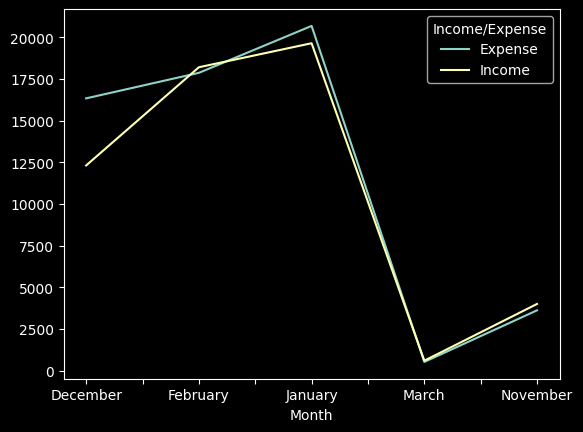

In [18]:
df.pivot_table(index = 'Month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()


In [19]:
# what are vectorized operations
np.array([1,2,3,4,5]) * 4

array([ 4,  8, 12, 16, 20])

In [20]:
# promblem in vectorized operations in vanilla python
s=['cat','dog','bird',None]
[i.startswith('c') for i in s ]

AttributeError: 'NoneType' object has no attribute 'startswith'

In [ ]:
# how pandas solve this problem
s=pd.Series(['cat','dog','bird',None])
#string accessor
s.str.startswith('c')

0     True
1    False
2    False
3     None
dtype: object

In [21]:
# importing tatanic dataset 
df = pd.read_csv('../datasets/titanic.csv')

In [22]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [23]:
name = df['Name']

In [24]:
name.str.upper()
name.str.lower()
name.str.split()
name.str.replace('Mr.','Mr')
name.str.capitalize()
name.str.len()
name.str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [25]:
df ['lastname'] = name.str.split(',').str.get(0)

In [26]:
df[['title','firstname']]=name.str.split(',').str.get(1).str.strip().str.split(n = 1,expand=True)
df['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Ms.            1
Mme.           1
Don.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [27]:
df['title'] = df['title'].str.replace('.','')

In [28]:
df['Name'][df['Name'].str.startswith('M')]


5                 Moran, Mr. James
6          McCarthy, Mr. Timothy J
19         Masselmani, Mrs. Fatima
22     McGowan, Miss. Anna "Annie"
34         Meyer, Mr. Edgar Joseph
                  ...             
839           Marechal, Mr. Pierre
841       Mudd, Mr. Thomas Charles
847             Markoff, Mr. Marin
881             Markun, Mr. Johann
886          Montvila, Rev. Juozas
Name: Name, Length: 74, dtype: object

In [29]:
df['Name'][df['Name'].str.isdecimal()]

Series([], Name: Name, dtype: object)

In [30]:
# applying regex
df['Name'][df['Name'].str.contains('Mr|Mrs',case=False)]
# contains
df['Name'][df['Name'].str.contains('Mr',case=False)]
# find lastname with startwith vowel and end with consonant
df['Name'][df['Name'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$',case=False,regex=True)].shape[0]

26

In [31]:
# sclicing
df['Name'].str[:5]

0      Braun
1      Cumin
2      Heikk
3      Futre
4      Allen
       ...  
886    Montv
887    Graha
888    Johns
889    Behr,
890    Doole
Name: Name, Length: 891, dtype: object

In [32]:
# what is time stamp in pandas
type(pd.Timestamp('2020-01-01'))

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
# variation 
pd.Timestamp('2020/01/01 12:00:00')

Timestamp('2020-01-01 12:00:00')

In [34]:
pd.Timestamp('2020,01,01 12:00:00')

Timestamp('2020-01-01 12:00:00')

In [35]:
# using text 
pd.to_datetime('2020-January-01 12:01PM')

Timestamp('2020-01-01 12:01:00')

In [36]:
# using datetime.datetime object
import datetime
datetime.datetime(2020,1,1)
x = pd.to_datetime(datetime.datetime(2020,1,1,9,10,50))

In [37]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

50

In [38]:
# useing numpy
date =np.datetime64('2020-01-01')
date+np.arange(12)

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'],
      dtype='datetime64[D]')

In [39]:
pd.DatetimeIndex(['2020-01-01','2020-01-02','2020-01-03'])

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq=None)

In [40]:
# Using pd.Timestamp
df_index = pd.DatetimeIndex(pd.Timestamp('2020-01-01'),pd.Timestamp('2020-01-01'))

TypeError: DatetimeIndex(...) must be called with a collection of some kind, Timestamp('2020-01-01 00:00:00') was passed

In [41]:
#using pd.date_range
pd.date_range('2020-01-01',periods=10,freq='1D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [42]:
# Bussiness day
pd.date_range('2020-01-01',periods=10,freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

In [43]:
# one week per day 
pd.date_range('2020-01-01',periods=10,freq='W')

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08'],
              dtype='datetime64[ns]', freq='W-SUN')

In [44]:
# Hourly
pd.date_range('2020-01-01',periods=10,freq='h')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='h')

In [45]:
# monthly
pd.date_range('2020-01-01',periods=10,freq='ME')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', freq='ME')

In [46]:
# yearly
pd.date_range('2020-01-01',periods=10,freq='YE')

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [47]:
# using periods
pd.date_range('2020-01-01',periods=10,freq='M')

C:\Users\kmoha\AppData\Local\Temp\ipykernel_10740\3006180033.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range('2020-01-01',periods=10,freq='M')


DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', freq='ME')

In [48]:
df = pd.read_csv('../datasets/expense_data.csv')

In [49]:
# with error 
d = pd.Series(['2020-1-10','2010-10-1', '2010-10-10','2010-10-10','2010-120-10'])
pd.to_datetime(d,errors='coerce')

0   2020-01-10
1   2010-10-01
2   2010-10-10
3   2010-10-10
4          NaT
dtype: datetime64[ns]

In [50]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [51]:
df['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

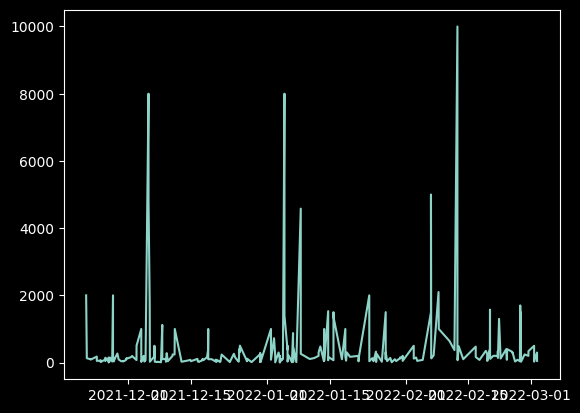

In [52]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

<Axes: xlabel='Date'>

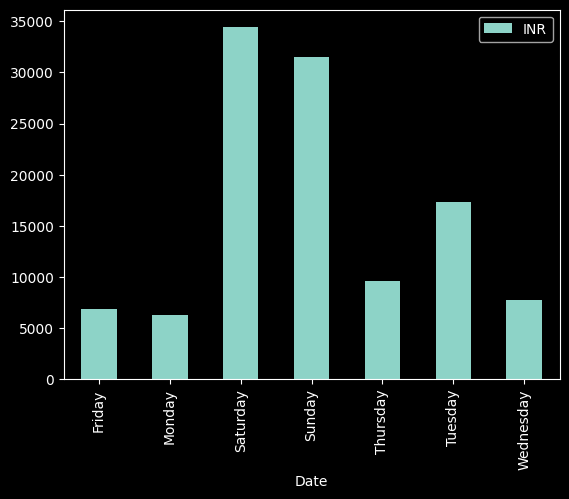

In [53]:
# day name wise bar chart 
df.pivot_table(index = df['Date'].dt.day_name(),values='INR',aggfunc='sum').plot(kind='bar')